# Load Data

In [360]:
# Load the required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## Load Required Files

In [361]:
companies = pd.read_table('companies.txt', encoding = 'latin1')
rounds2 = pd.read_csv('rounds2.csv', encoding = 'latin1')

## Checkpoints Part 1
### Checkpoint 1: Data Cleaning 1


In [362]:
# convert permalink to lowercase (as mentioned in https://stackoverflow.com/questions/22245171/how-to-lowercase-a-python-dataframe-string-column-if-it-has-missing-values)

companies['permalink'] = companies['permalink'].astype(str).str.lower()

In [363]:
# Same, convert company_permalink to lowercase
rounds2['company_permalink'] = rounds2['company_permalink'].astype(str).str.lower()

In [364]:
# Check if any value is null
print(rounds2['company_permalink'].isnull().sum())

# Check how many company IDs are there
print(len(rounds2['company_permalink']))

# check how many unique company IDs are there
print("unique Companies in rounds 2 : {}".format(len(rounds2['company_permalink'].unique())))

0
114949
unique Companies in rounds 2 : 66370


In [365]:
# Check if any value is null
print(companies['permalink'].isnull().sum())

# Check how many company IDs are there
print(len(companies['permalink']))

# check how many unique company IDs are there
print("Unique Companies in companies DF : {}".format(len(companies['permalink'].unique())))

0
66368
Unique Companies in companies DF : 66368


#### Q. Are there any companies in the rounds2 file which are not present in companies?
Y <br/>
since unique companies in rounds2 Dataframe are more than there are companies mentioned in companies Dataframe.
we already know that there are indeed more companies in rounds2 Dataframe.

#### Q. In the companies data frame, which column can be used as the unique key for each company?
in Companies DF, as companies['permalink'] has unique values, it can be used as primary key

In [366]:
# Let's try to find how many unique companies there are in each DF
a = companies['permalink']
b = rounds2['company_permalink']

# Companies in companies DF and not in rounds2 DF
c = pd.Series(list(set(a) - set(b)))

# Companies in rounds2 DF and not in companies DF
d = pd.Series(list(set(b) - set(a)))

print("Companies in companies DF and not in rounds2 DF : {}".format(len(c)))
print("Companies in rounds2 DF and not in companies DF : {}".format(len(d)))

Companies in companies DF and not in rounds2 DF : 5
Companies in rounds2 DF and not in companies DF : 7


#### Merge rounds2 and companies, such that all the variables in companies are merged in rounds2

In [367]:
master_frame = rounds2.merge(companies, how='left', left_on='company_permalink', right_on='permalink')

#### Q. How many observations are present in master_frame ?

In [368]:
master_frame.shape[0]

114949

### Checkpoint 2: Funding Type Analysis

In [369]:
# How many null values in funding_round_type
print(master_frame['funding_round_type'].isnull().sum())

# as there are only 5 values with null funding_round_type, can be removed
master_frame = master_frame[~master_frame['funding_round_type'].isnull()]

# How many unique values in funding_round_type
print(master_frame['funding_round_type'].unique())

venture = master_frame.loc[master_frame['funding_round_type'] == 'venture']
angel = master_frame.loc[master_frame['funding_round_type'] == 'angel']
seed = master_frame.loc[master_frame['funding_round_type'] == 'seed']
private_equity = master_frame.loc[master_frame['funding_round_type'] == 'private_equity']

0
['venture' 'seed' 'undisclosed' 'equity_crowdfunding' 'convertible_note'
 'private_equity' 'debt_financing' 'angel' 'grant' 'secondary_market'
 'post_ipo_equity' 'post_ipo_debt' 'product_crowdfunding'
 'non_equity_assistance']


#### Q. Average funding amount of venture type

In [370]:
print("Average Raised Amount for Venture : {}".format(round(venture['raised_amount_usd'].mean(),2)))
print("Number of investment for Venture : {}".format(len(venture)))

Average Raised Amount for Venture : 11748949.13
Number of investment for Venture : 55494


#### Q. Average funding amount of Angel type

In [371]:
print("Average Raised Amount for Angel : {}".format(round(angel['raised_amount_usd'].mean(),2)))
print("Number of investment for Angel : {}".format(len(angel)))

Average Raised Amount for Angel : 958694.47
Number of investment for Angel : 6094


#### Q. Average funding amount of Seed type

In [372]:
print("Average Raised Amount for Seed : {}".format(round(seed['raised_amount_usd'].mean(),2)))
print("Number of investment for Seed : {}".format(len(seed)))

Average Raised Amount for Seed : 719818.0
Number of investment for Seed : 30524


#### Q. Average funding amount of Private Equity type

In [373]:
print("Average Raised Amount for Private Equity : {}".format(round(private_equity['raised_amount_usd'].mean(),2)))
print("Number of investment for Private Equity : {}".format(len(private_equity)))

Average Raised Amount for Private Equity : 73308593.03
Number of investment for Private Equity : 2285


#### Q. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?
Since Venture is the only data type with mean value between 5 and 15 million, this is the correct choice of fund type for Spark Funds.

## Checkpoints - Part 2
### Checkpoint 3: Country Analysis

In [374]:
# Remove entires with NaN raised_amount_usd
venture = venture.loc[~venture['raised_amount_usd'].isnull()]
# remove entires with NaN country
venture = venture.loc[~venture['country_code'].isnull()]

#### Q. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [375]:
# venture.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False).index.values[0:9]
venture.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False)[0:9]

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


#### Q. Top 3 English-Speaking Countries
Since China is not a English speaking country, So, top English speaking countries would be USA, Great Britain and India

In [376]:
# Now, make top9
top9 = venture[(venture['country_code'] == 'USA') | (venture['country_code'] == 'CHN') | (venture['country_code'] == 'GBR') 
           | (venture['country_code'] == 'IND') | (venture['country_code'] == 'CAN') | (venture['country_code'] == 'FRA')
           | (venture['country_code'] == 'ISR') | (venture['country_code'] == 'DEU') | (venture['country_code'] == 'JPN')]

# Remove empty category_list
top9 = top9[~top9['category_list'].isnull()]

# Fetch primary_sector from category_list
top9['primary_sector'] = top9['category_list'].apply(lambda x: x.split('|')[0])

In [377]:
# Read Mapping csv now
mapping = pd.read_table('mapping.csv', encoding='latin1', sep= ',')

In [378]:
# Remove Blanks column
mapping = mapping.drop(columns=['Blanks'])

# Remove row with empty category_list
mapping = mapping[~mapping['category_list'].isnull()]

### Checkpoint 4: Sector Analysis 1

In [379]:
# Create mapping_data_types to refer to later
mapping_data_types = ['', 'Automotive & Sports', 'Cleantech / Semiconductors',  'Entertainment', 'Health', 
                      'Manufacturing', 'News, Search and Messaging', 'Others', 
                      'Social, Finance, Analytics, Advertising']

# change values in mapping DF, So that columns with 1 will have column index as value instead of 1
mapping[mapping_data_types[1]] = mapping[mapping_data_types[1]] * 1
mapping[mapping_data_types[2]] = mapping[mapping_data_types[2]] * 2
mapping[mapping_data_types[3]] = mapping[mapping_data_types[3]] * 3
mapping[mapping_data_types[4]] = mapping[mapping_data_types[4]] * 4
mapping[mapping_data_types[5]] = mapping[mapping_data_types[5]] * 5
mapping[mapping_data_types[6]] = mapping[mapping_data_types[6]] * 6
mapping[mapping_data_types[7]] = mapping[mapping_data_types[7]] * 7
mapping[mapping_data_types[8]] = mapping[mapping_data_types[8]] * 8

In [380]:
# Create a new column which will have category value for each row
mapping['category_value'] = mapping.sum(axis=1)

In [381]:
def set_main_sector(x):
    category = mapping[mapping['category_list'] == x]
    
    if len(category) == 1:
        return mapping_data_types[category['category_value'].values[0]]

# set main sector in top9 DF now
top9['main_sector'] = top9['primary_sector'].map(set_main_sector)

In [382]:
# since there are 2869 entries in top9 with no main_sector associated, we shall remove such rows from top9
top9 = top9[~top9['main_sector'].isnull()]

### Checkpoint 5: Sector Analysis 2

In [383]:
# Now we know following information
# 1. Top 3 English speaking countries with highest investment are USA, GBR and CAN.
# 2. The range of funding preferred by Spark Funds is 5 to 15 million USD. 
# 3. Venture Fund Type is preferred Fund Type.
#
# The aim is to find out the most heavily invested main sectors in each of the three countries

D1 = top9[(top9['country_code'] == 'USA') & (5000000 <= top9['raised_amount_usd']) & (top9['raised_amount_usd'] <= 15000000)]
D2 = top9[(top9['country_code'] == 'GBR') & (5000000 <= top9['raised_amount_usd']) & (top9['raised_amount_usd'] <= 15000000)]
D3 = top9[(top9['country_code'] == 'CAN') & (5000000 <= top9['raised_amount_usd']) & (top9['raised_amount_usd'] <= 15000000)]

In [384]:
print("Total number of investment in C1 : {}".format(len(D1['raised_amount_usd'])))
print("Total amount of investment in C1 : {}".format(D1['raised_amount_usd'].sum()))

print("Total number of investment in C2 : {}".format(len(D2['raised_amount_usd'])))
print("Total amount of investment in C2 : {}".format(D2['raised_amount_usd'].sum()))

print("Total number of investment in C3 : {}".format(len(D3['raised_amount_usd'])))
print("Total amount of investment in C3 : {}".format(D3['raised_amount_usd'].sum()))

Total number of investment in C1 : 11149
Total amount of investment in C1 : 99661524549.0
Total number of investment in C2 : 577
Total amount of investment in C2 : 5028704358.0
Total number of investment in C3 : 394
Total amount of investment in C3 : 3374289958.0


In [385]:
print("Top Sectors Names (No of Investment wise) in C1")
D1.groupby('main_sector')['raised_amount_usd'].agg(['count', 'sum']).sort_values(by = 'count', ascending = False).head(3)

Top Sectors Names (No of Investment wise) in C1


,count,sum
main_sector,,
Others,2923,2.608928e+10
Cleantech / Semiconductors,2297,2.118100e+10
"Social, Finance, Analytics, Advertising",1912,1.668070e+10


In [386]:
print("Top Sectors Names (No of Investment wise) in C2")
D2.groupby('main_sector')['raised_amount_usd'].agg(['count', 'sum']).sort_values(by = 'count', ascending = False).head(3)

Top Sectors Names (No of Investment wise) in C2


,count,sum
main_sector,,
Others,143,1.249124e+09
Cleantech / Semiconductors,127,1.136905e+09
"Social, Finance, Analytics, Advertising",98,8.218884e+08


In [387]:
print("Top Sectors Names (No of Investment wise) in C3")
D3.groupby('main_sector')['raised_amount_usd'].agg(['count', 'sum']).sort_values(by = 'count', ascending = False).head(3)

Top Sectors Names (No of Investment wise) in C3


,count,sum
main_sector,,
Cleantech / Semiconductors,112,1.015888e+09
Others,109,9.261380e+08
"Social, Finance, Analytics, Advertising",52,4.433431e+08


In [388]:
def set_count_and_sum(x):
    rows_with_main_sector = D1[D1['main_sector'] == x]
    
    rows_with_main_sector['main_sector_count'] = temp.loc[x]['count']
    rows_with_main_sector['main_sector_sum'] = temp.loc[x]['sum']
    
    print(rows_with_main_sector.columns)

#temp.index.map(set_count_and_sum)

In [389]:
D1[D1['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].agg(['sum']).sort_values(
    by = 'sum', ascending = False).head(3)

,sum
name,
Virtustream,64300000.0
Capella Photonics,54968051.0
AirTight Networks,54201907.0


In [390]:
D2[D2['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].agg(['sum']).sort_values(
    by = 'sum', ascending = False).head(3)

,sum
name,
Electric Cloud,37000000.0
SenSage,36250000.0
Enigmatec,32500000.0


D3[D3['main_sector'] == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].agg(['sum']).sort_values(
    by = 'sum', ascending = False).head(3)

### Checkpoint 6: Plots

#### Q. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.

In [403]:
# Get all rows that we require in plot1
plot1 = master_frame[(master_frame['funding_round_type'] == 'venture') | 
    (master_frame['funding_round_type'] == 'seed') | 
    (master_frame['funding_round_type'] == 'private_equity')]

# Get all rows in master_frame and set funding_round_type as all
temp = master_frame.copy(deep = True)
temp.loc[:, ('funding_round_type')] = 'all'

# append to plot1
plot1 = plot1.append(temp)

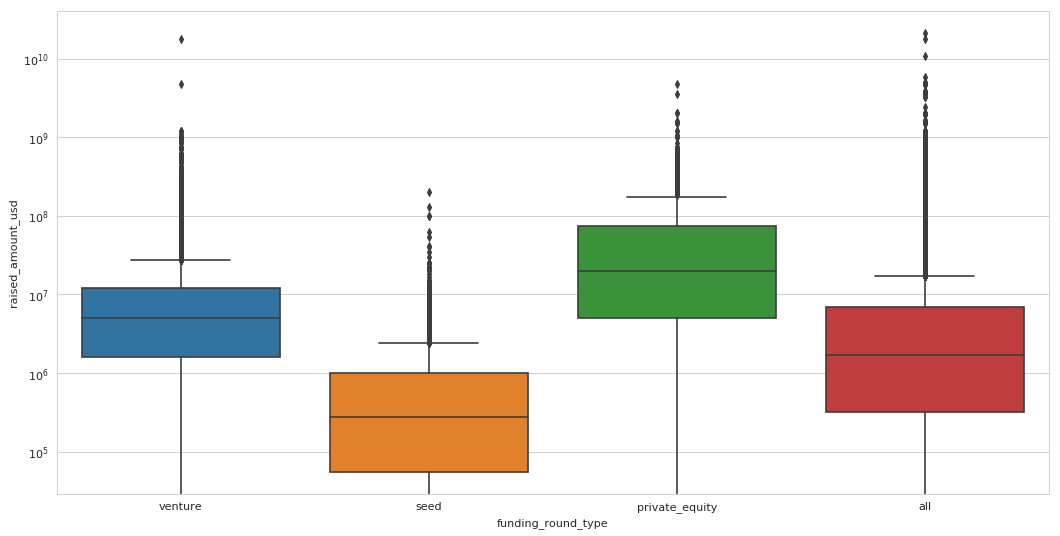

In [404]:
# Solution Plot 1
# Setup Plot
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.yscale('log')


# Show Plot
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=plot1)
plt.show()

#### Q. A plot showing the top 9 countries against the total amount of investments of funding type FT. 

In [393]:
top9.groupby('country_code')['raised_amount_usd'].agg(['sum']).sort_values(by = 'sum', ascending = False)

,sum
country_code,
USA,3.922376e+11
CHN,3.703144e+10
GBR,1.892439e+10
IND,1.353798e+10
CAN,8.715621e+09
FRA,7.033840e+09
ISR,6.520700e+09
DEU,5.751654e+09
JPN,2.798747e+09


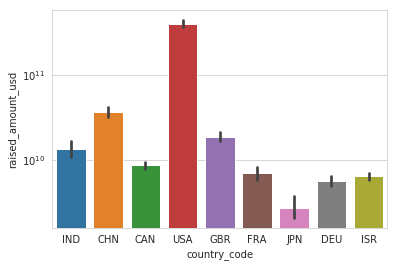

In [394]:
# Solution Plot 2
plt.yscale('log')

sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=sum)
plt.show()

#### Q. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [395]:
top3 = top9[
        (
            (top9['country_code'] == 'USA') & 
            (
                (top9['main_sector'] == 'Others') |
                (top9['main_sector'] == 'Cleantech / Semiconductors') |
                (top9['main_sector'] == 'Social, Finance, Analytics, Advertising')
            )
        ) | 
        (
            (top9['country_code'] == 'GBR') & 
            (
                (top9['main_sector'] == 'Others') |
                (top9['main_sector'] == 'Cleantech / Semiconductors') |
                (top9['main_sector'] == 'Social, Finance, Analytics, Advertising')
            )
        ) |
        (
            (top9['country_code'] == 'IND') & 
            (
                (top9['main_sector'] == 'Others') |
                (top9['main_sector'] == 'Cleantech / Semiconductors') |
                (top9['main_sector'] == 'Social, Finance, Analytics, Advertising')
            )
        )
        ]

In [396]:
top3.groupby(['country_code', 'main_sector'])['raised_amount_usd'].agg(['sum', 'count'])

sum  count
country_code main_sector                                                 
GBR          Cleantech / Semiconductors               5.028729e+09    433
             Others                                   4.400423e+09    507
             Social, Finance, Analytics, Advertising  2.851116e+09    318
IND          Cleantech / Semiconductors               7.864446e+08     54
             Others                                   6.318507e+09    281
             Social, Finance, Analytics, Advertising  8.667639e+08     77
USA          Cleantech / Semiconductors               1.187644e+11   7849
             Others                                   8.208458e+10   8243
             Social, Finance, Analytics, Advertising  6.206299e+10   5156

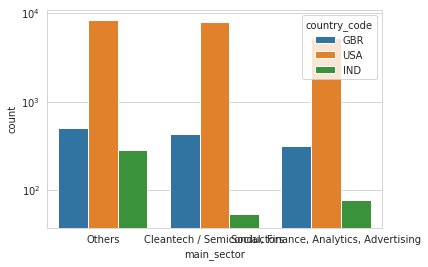

In [397]:
# Solution Plot 3
plt.yscale('log')

sns.countplot(x='main_sector', hue='country_code', data=top3)
plt.show()